In [1]:
import os
import utilities as rocku
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import timeit
from pystackreg import StackReg
from PIL import Image
from tqdm import tqdm

In [2]:
ncore = mp.cpu_count()
ncore

64

In [3]:
# need to change
ipts="32298"
# scan_type = 'ct_scans'
# scan_type = 'radiographs'
scan_type = 'processed_data'
# scan_type = 'analysis'
# scan_type = 'analysis'
####################################
##################################
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/" + scan_type
folder_list = os.listdir(scan_loc)
folder_list.sort()
folder_list

['2024_08_01_Ni_Fe2O3_15umG2',
 '2024_08_01_Ni_Fe2O3_15umG2_rebin_by_2height_2width',
 '2024_08_01_nGI_DC_rebin_by_2height_2width',
 'pixel_binned',
 'rockit']

In [4]:
sample_name = "2024_08_01_Ni_Fe2O3_15umG2"
# distance_to_G2_cm = 1.6
distance_to_G2_cm = 1
reverse_sort = False
reverse_motor = False
######################
wavelen_ang = 2.5
# period_um = 56.5
period_um = 15
name_pattern_std = ["TI_ACL", "DFI_ACL", "DPC_ACL"]
name_pattern = ["TI_ACL", "DFI_ACL", "DPC_ACL", "AI_ACL", "DFI_over_AI_ACL"]
ref_name = name_pattern[0]
######################
######################
######################
scan_dir = os.path.join(scan_loc, sample_name)
fname_list = os.listdir(scan_dir)
fname_list.sort()
fname_dict = {}
for e_pa in name_pattern:
    _fname_list = rocku.filter_list(fname_list, e_pa)
    _fname_list.sort(reverse=reverse_sort)
    fname_dict[e_pa] = _fname_list
pos_list = []
for each in fname_dict[name_pattern[0]]:
    _n = each.split('.')[0]
    _num = int(_n.split('_')[-1])
    pos_list.append(_num)
######################
fname_dict_out = {}
acl_list = []
pos_max = max(pos_list)
pos_min = min(pos_list)
for e_pos in pos_list:
    if reverse_motor:
        _acl_nm = int(1000*wavelen_ang*((pos_max-e_pos)/10 + distance_to_G2_cm)/period_um)
    else:
        _acl_nm = int(1000*wavelen_ang*((e_pos-pos_min)/10 + distance_to_G2_cm)/period_um)
    acl_list.append("{:04d}".format(_acl_nm) + "nm")
for e_pa in name_pattern:
    _fname_list_out = []
    for e_acl in acl_list:
        _fname_list_out.append("_".join([e_pa, e_acl]))
    fname_dict_out[e_pa] = _fname_list_out
for ea_pa in name_pattern:
    print(ea_pa)
    for m, ea_file in enumerate(fname_dict[ea_pa]):
        print("'{}' converted to '{}'".format(ea_file, fname_dict_out[ea_pa][m]))

TI_ACL
'TI_ACL_074.fits' converted to 'TI_ACL_0166nm'
'TI_ACL_080.fits' converted to 'TI_ACL_0266nm'
'TI_ACL_086.fits' converted to 'TI_ACL_0366nm'
'TI_ACL_092.fits' converted to 'TI_ACL_0466nm'
'TI_ACL_098.fits' converted to 'TI_ACL_0566nm'
'TI_ACL_104.fits' converted to 'TI_ACL_0666nm'
'TI_ACL_110.fits' converted to 'TI_ACL_0766nm'
'TI_ACL_116.fits' converted to 'TI_ACL_0866nm'
'TI_ACL_122.fits' converted to 'TI_ACL_0966nm'
'TI_ACL_128.fits' converted to 'TI_ACL_1066nm'
'TI_ACL_134.fits' converted to 'TI_ACL_1166nm'
'TI_ACL_140.fits' converted to 'TI_ACL_1266nm'
'TI_ACL_146.fits' converted to 'TI_ACL_1366nm'
'TI_ACL_152.fits' converted to 'TI_ACL_1466nm'
'TI_ACL_158.fits' converted to 'TI_ACL_1566nm'
'TI_ACL_164.fits' converted to 'TI_ACL_1666nm'
'TI_ACL_170.fits' converted to 'TI_ACL_1766nm'
'TI_ACL_176.fits' converted to 'TI_ACL_1866nm'
'TI_ACL_182.fits' converted to 'TI_ACL_1966nm'
'TI_ACL_188.fits' converted to 'TI_ACL_2066nm'
'TI_ACL_194.fits' converted to 'TI_ACL_2166nm'
'TI_AC

In [7]:
unreg_dict = {}
for e_pa in name_pattern_std:
    print("Loading {} ...".format(e_pa))
    _img_stack = rocku.read_img_stack(scan_dir, fname_dict[e_pa], flipud=True)
    unreg_dict[e_pa] = _img_stack.astype(np.float32)

Loading TI_ACL ...


34it [00:06,  5.19it/s]


Loading DFI_ACL ...


34it [00:08,  3.91it/s]


Loading DPC_ACL ...


34it [00:09,  3.50it/s]


Text(0.5, 1.0, 'last image')

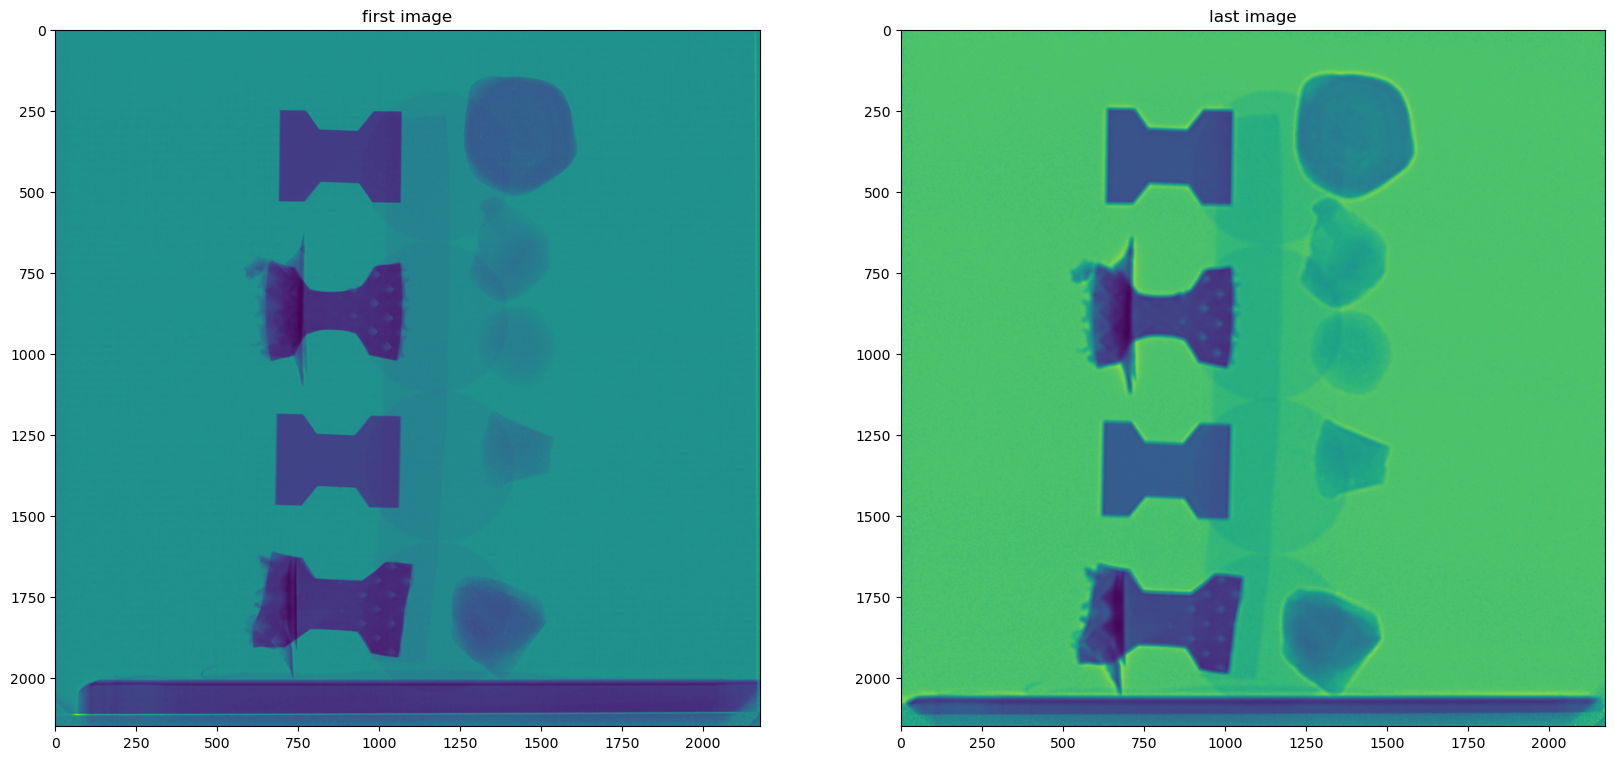

In [8]:
# img_min = np.min(unreg_dict[name_pattern[0]], axis=0)

f, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(unreg_dict[ref_name][0])
ax[0].set_title('first image')

ax[1].imshow(unreg_dict[ref_name][-1])
ax[1].set_title('last image')

# ax[2].imshow(img_min)
# ax[2].set_title('np.min')

In [9]:
###################### need to change start
# crop = False
crop = False
# crop_left = 250
# crop_right = 1650
# crop_top = 750
# crop_bottom = 1950
crop_left = 300
crop_right = 1600
crop_top = 250
crop_bottom = 1600
###################### need to change end
# proj_crop = rocku.crop(proj_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# ob_crop = rocku.crop(ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# dc_crop = rocku.crop(dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
first_crop = rocku.crop(unreg_dict[ref_name][0], crop_left, crop_right, crop_top, crop_bottom, crop)
last_crop = rocku.crop(unreg_dict[ref_name][-1], crop_left, crop_right, crop_top, crop_bottom, crop)

if crop:
    f, ax = plt.subplots(1, 2, figsize=(20, 20))
    ax[0].imshow(first_crop)
    ax[0].set_title('first image')

    ax[1].imshow(last_crop)
    ax[1].set_title('last image')

In [10]:
for ea_pa in unreg_dict.keys():
    unreg_dict[ea_pa] = rocku.crop(unreg_dict[ea_pa], crop_left, crop_right, crop_top, crop_bottom, crop)
trans_algo_dict = {
    'TRANSLATION': StackReg.TRANSLATION,
    'RIGID_BODY': StackReg.RIGID_BODY,
    'SCALED_ROTATION': StackReg.SCALED_ROTATION,
    'AFFINE': StackReg.AFFINE,
    'BILINEAR': StackReg.BILINEAR
}

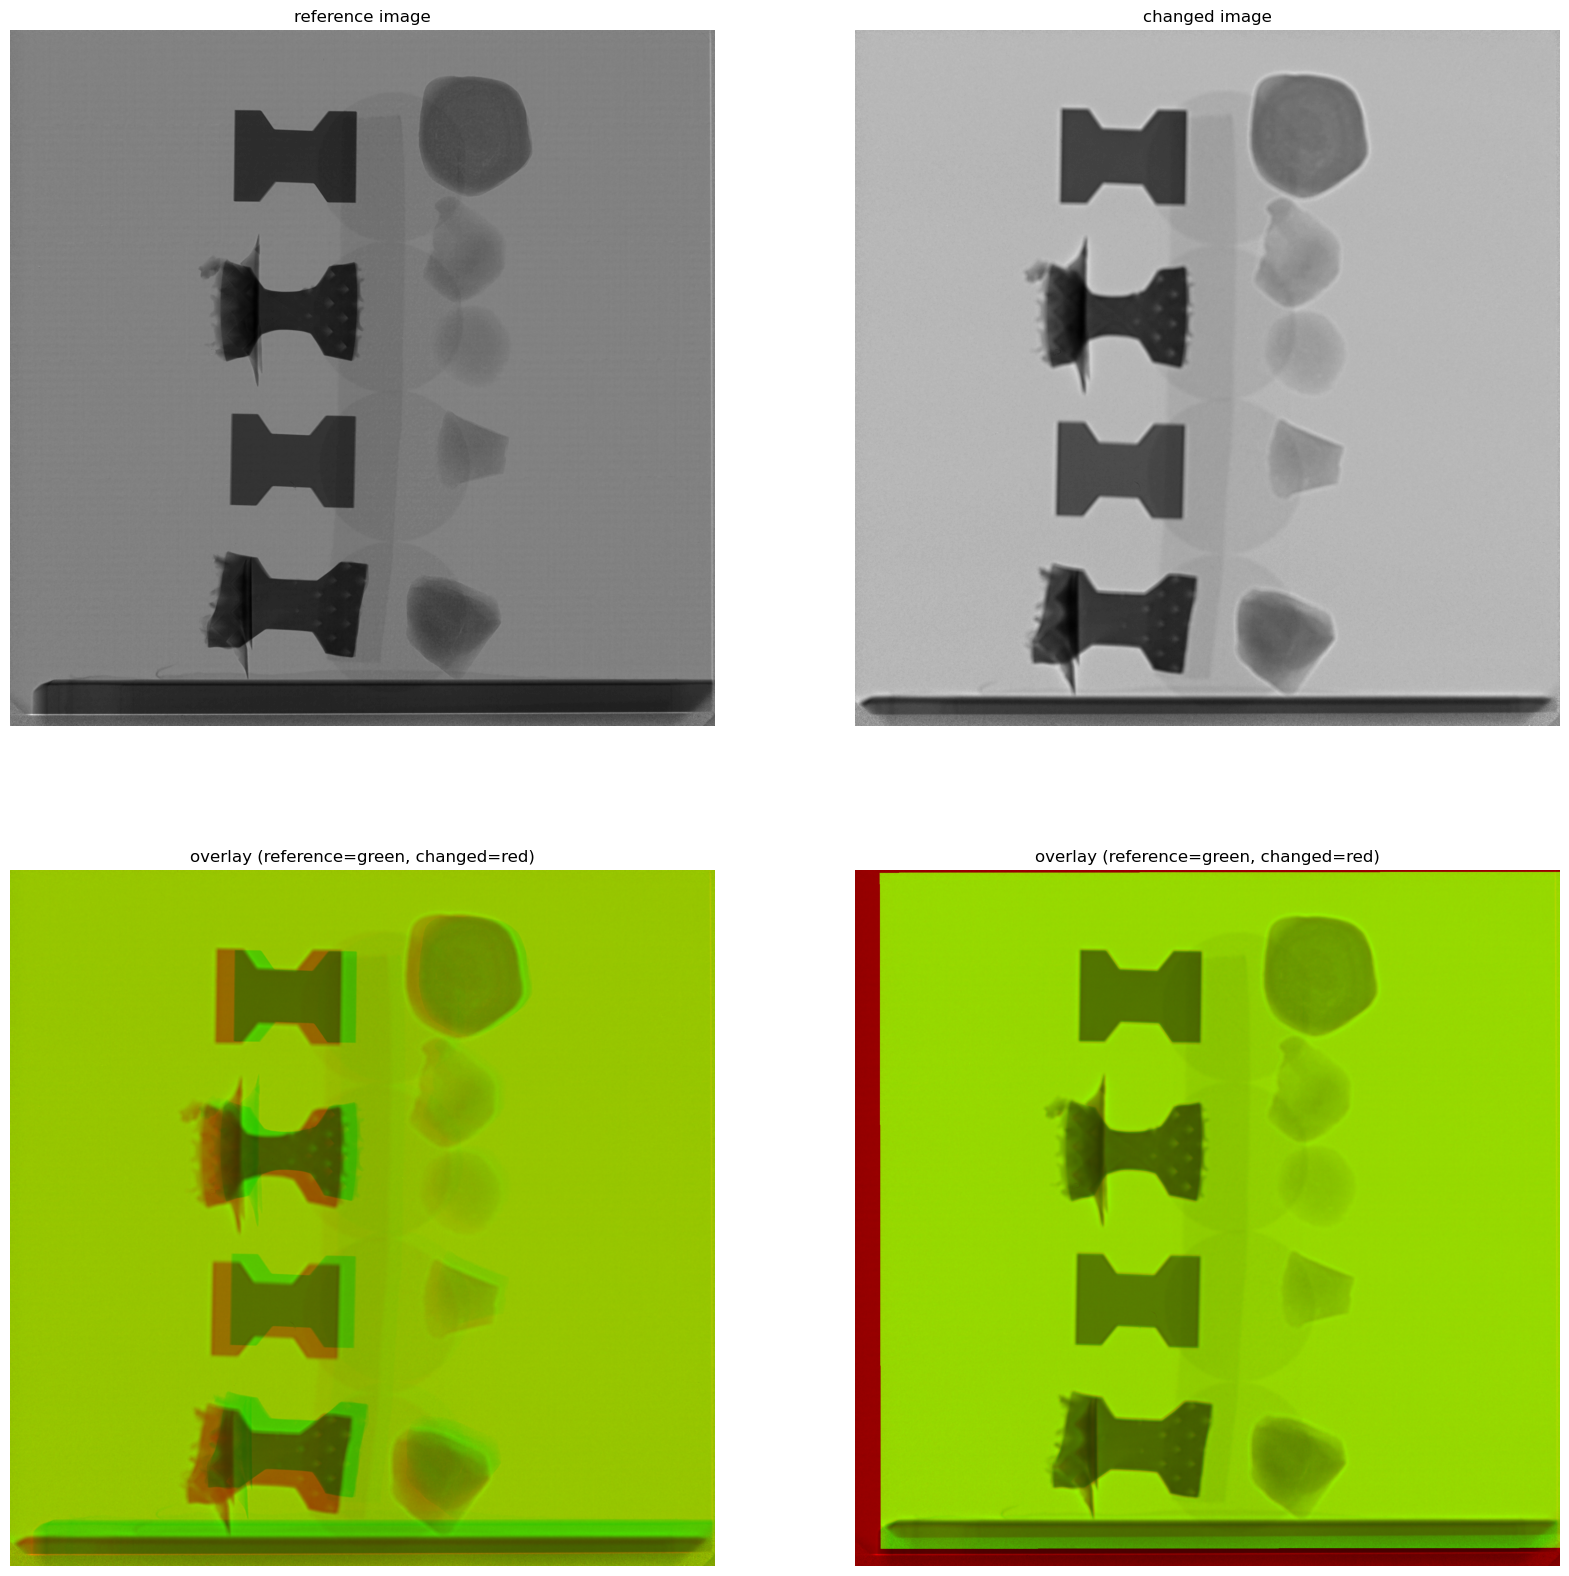

In [11]:
trans_algo = "SCALED_ROTATION"
#########################
#load reference and "moved" image
ref = unreg_dict[ref_name][0]
mov = unreg_dict[ref_name][-1]
#########################
sr = StackReg(trans_algo_dict[trans_algo])
reg = sr.register_transform(ref, mov)
reg = reg.clip(min=0)
after_reg = rocku.composite_images([ref, reg])
before_reg = rocku.composite_images([ref, mov])

f, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0][0].imshow(ref, cmap='gray')
ax[0][0].set_title('reference image')
ax[0][0].axis('off')

ax[0][1].imshow(mov, cmap='gray')
ax[0][1].set_title('changed image')
ax[0][1].axis('off')

ax[1][0].imshow(before_reg)
ax[1][0].set_title('overlay (reference=green, changed=red)')
ax[1][0].axis('off');

ax[1][1].imshow(after_reg)
ax[1][1].set_title('overlay (reference=green, changed=red)')
ax[1][1].axis('off');

In [12]:
reg_dict = {}
sr = StackReg(trans_algo_dict[trans_algo])
print("Registration using '{}'".format(ref_name))
tmats = sr.register_stack(unreg_dict[ref_name], reference='previous', progress_callback=rocku.show_progress)
for ee in unreg_dict.keys():
    print("Apply transform to {}".format(ee))
    reg_dict[ee] = sr.transform_stack(unreg_dict[ee], tmats=tmats)

Registration using 'TI_ACL'
Registering 1 of 33 images
Registering 2 of 33 images
Registering 3 of 33 images
Registering 4 of 33 images
Registering 5 of 33 images
Registering 6 of 33 images
Registering 7 of 33 images
Registering 8 of 33 images
Registering 9 of 33 images
Registering 10 of 33 images
Registering 11 of 33 images
Registering 12 of 33 images
Registering 13 of 33 images
Registering 14 of 33 images
Registering 15 of 33 images
Registering 16 of 33 images
Registering 17 of 33 images
Registering 18 of 33 images
Registering 19 of 33 images
Registering 20 of 33 images
Registering 21 of 33 images
Registering 22 of 33 images
Registering 23 of 33 images
Registering 24 of 33 images
Registering 25 of 33 images
Registering 26 of 33 images
Registering 27 of 33 images
Registering 28 of 33 images
Registering 29 of 33 images
Registering 30 of 33 images
Registering 31 of 33 images
Registering 32 of 33 images
Registering 33 of 33 images
Apply transform to TI_ACL
Apply transform to DFI_ACL
Appl

In [13]:
reg_dict["AI_ACL"] = 1 - reg_dict["TI_ACL"]
# reg_dict["AI_ACL"] = reg_dict["AI_ACL"].clip(max=10)
reg_dict["DFI_over_AI_ACL"] = np.true_divide(reg_dict["DFI_ACL"], reg_dict["AI_ACL"])
reg_dict["DFI_over_AI_ACL"] = reg_dict["DFI_over_AI_ACL"].clip(min=0, max=5)

/tmp/ipykernel_2161382/3812123070.py:3: RuntimeWarning: divide by zero encountered in divide
  reg_dict["DFI_over_AI_ACL"] = np.true_divide(reg_dict["DFI_ACL"], reg_dict["AI_ACL"])


# Save files

In [14]:
################ change save path for your own
save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/analysis/" + sample_name + "_" + trans_algo# + '_test'
if not os.path.exists(save_to):
    os.mkdir(save_to)
print("Saving to '{}' ...".format(save_to))
for each in name_pattern:
    for i, e_name in tqdm(enumerate(fname_dict_out[each])):
        fname = save_to + "/" + e_name + ".tiff"
        img_pl = Image.fromarray(reg_dict[each][i])
        img_pl.save(fname)

Saving to '/HFIR/CG1D/IPTS-32298/shared/analysis/2024_08_01_Ni_Fe2O3_15umG2_SCALED_ROTATION' ...


34it [00:01, 21.19it/s]
34it [00:01, 23.01it/s]
34it [00:01, 23.20it/s]
34it [00:01, 22.92it/s]
34it [00:01, 23.85it/s]


(-0.5, 2174.5, 2149.5, -0.5)

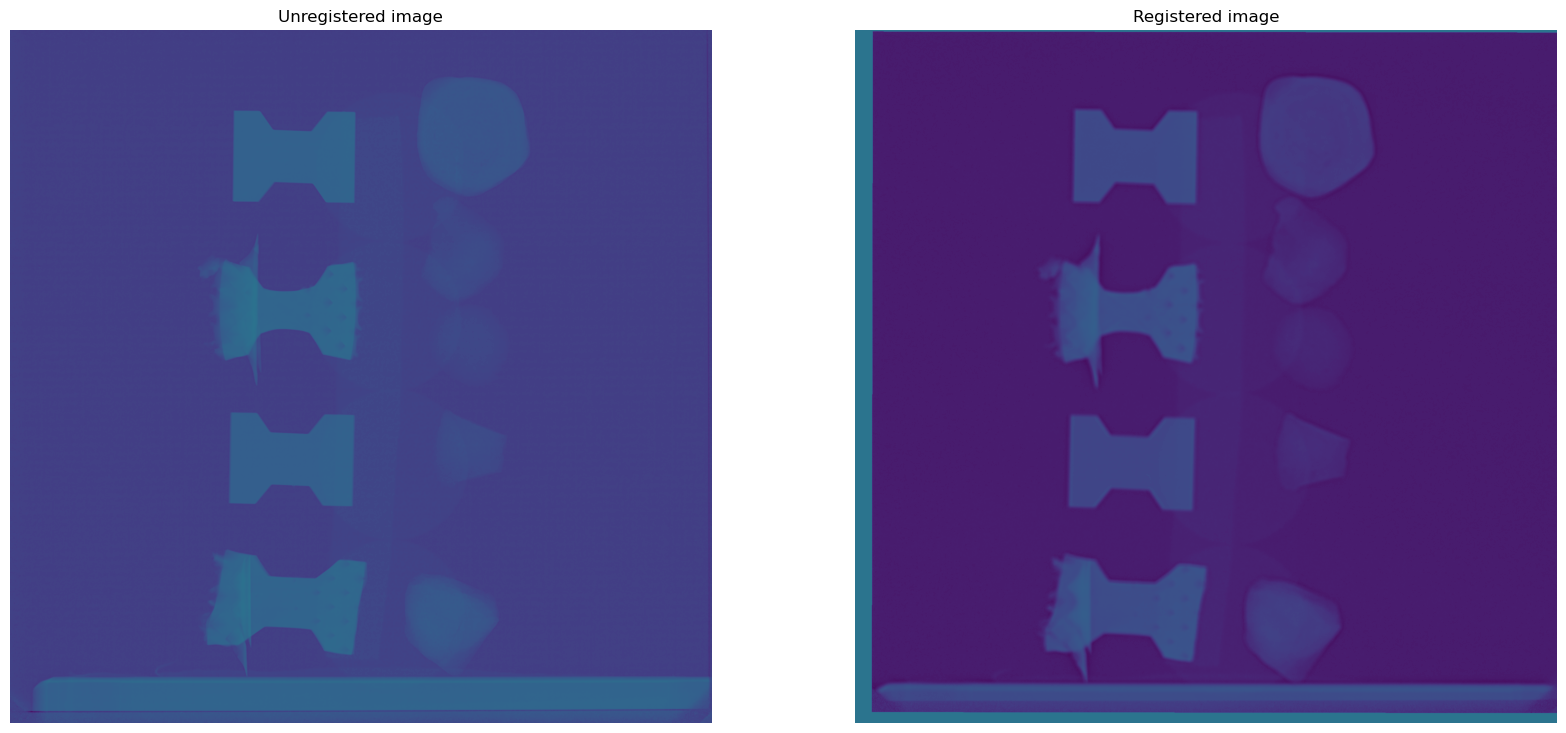

In [15]:
img_idx = -1
img_name = name_pattern[3]
#########################
f, ax = plt.subplots(1, 2, figsize=(20, 9))
check_reg =  rocku.composite_images([reg_dict[img_name][0], reg_dict[img_name][img_idx]])

ax[0].imshow(reg_dict[img_name][0], vmax=3)
ax[0].set_title('Unregistered image')
ax[0].axis('off')

ax[1].imshow(reg_dict[img_name][img_idx], vmax=3)
ax[1].set_title('Registered image')
ax[1].axis('off')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


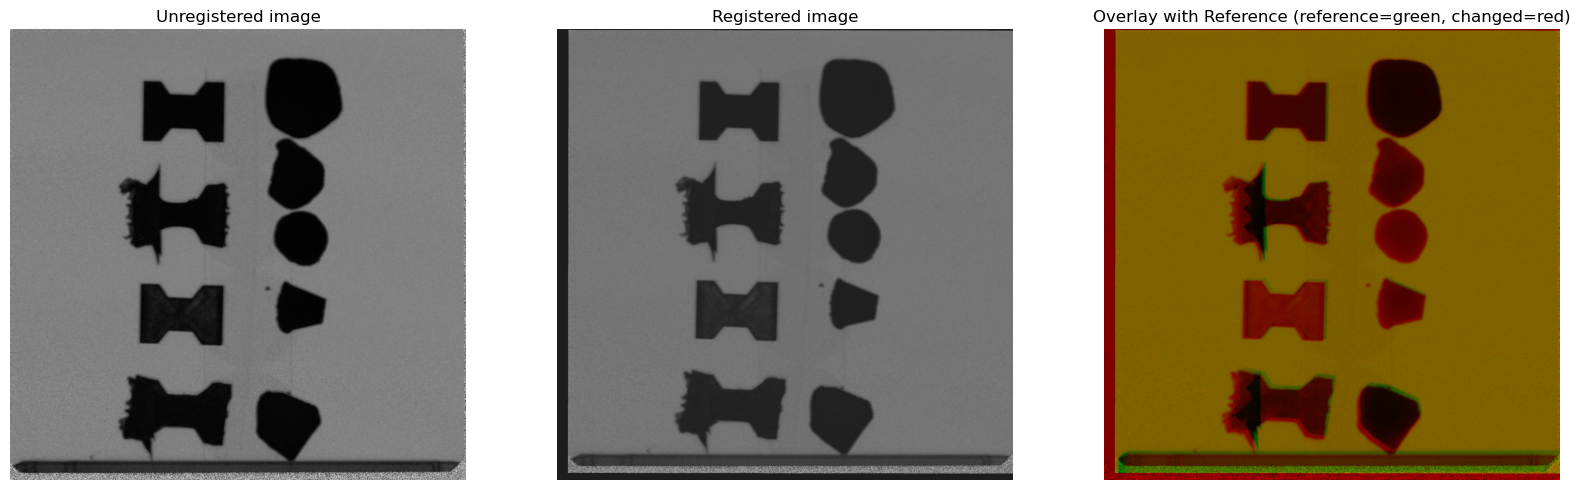

In [16]:
img_idx = -1
img_name = name_pattern[1]
#########################
f, ax = plt.subplots(1, 3, figsize=(20, 9))
check_reg = rocku.composite_images([reg_dict[img_name][0], reg_dict[img_name][img_idx]])

ax[0].imshow(unreg_dict[img_name][img_idx], cmap='gray')
ax[0].set_title('Unregistered image')
ax[0].axis('off')

ax[1].imshow(reg_dict[img_name][img_idx], cmap='gray')
ax[1].set_title('Registered image')
ax[1].axis('off')

ax[2].imshow(check_reg)
ax[2].set_title('Overlay with Reference (reference=green, changed=red)')
ax[2].axis('off');